Constructing the training set 

In [1]:
import numpy as np

np.random.seed(42)

# Generate 500 random values of x between 0 and 1
x = np.random.rand(500)

# Generate the corresponding values of y
y = np.sin(5*np.pi*x) + np.random.normal(loc=0, scale=0.15, size=500)

# Construct the training set T
T = list(zip(x, y))

In [2]:
print(T)

[(0.3745401188473625, -0.33808391067384164), (0.9507143064099162, 0.9805541139643248), (0.7319939418114051, -0.7337889448967437), (0.5986584841970366, -0.06546462689568876), (0.15601864044243652, 0.50243615283952), (0.15599452033620265, 0.7112781845457443), (0.05808361216819946, 0.5929243275446328), (0.8661761457749352, 1.1368660075973396), (0.6011150117432088, 0.15940235004986392), (0.7080725777960455, -1.0623475183572473), (0.020584494295802447, 0.06076552246541689), (0.9699098521619943, 0.6583326002029919), (0.8324426408004217, 0.47065395089856743), (0.21233911067827616, -0.0069385715623756505), (0.18182496720710062, 0.04246613920911274), (0.18340450985343382, 0.16783268818466224), (0.3042422429595377, -0.9969940218449871), (0.5247564316322378, 0.9323839887843471), (0.43194501864211576, 0.41348685579380623), (0.2912291401980419, -0.8970969032669983), (0.6118528947223795, -0.34525408573969485), (0.13949386065204183, 0.7923075925052657), (0.29214464853521815, -0.9743525692578948), (0.

In [3]:
# Generate 50 random values of x between 0 and 1
x_test = np.random.rand(50)

# Generate the corresponding values of y
y_test = np.sin(5*np.pi*x_test) + np.random.normal(loc=0, scale=0.15, size=50)

# Construct the testing set
test = list(zip(x_test, y_test))


In [4]:
print(test)

[(0.2670282701694213, -0.9526897226135956), (0.878629986355158, 1.0007685106750355), (0.7974260216069281, 0.19440766141219937), (0.6584518346584255, -0.8043476616952868), (0.8505817290942419, 0.6302586267791441), (0.8672942009598024, 1.153085453391627), (0.7083629767150348, -1.2085860611126573), (0.837013328363672, 0.2193768983099716), (0.6974714616692836, -0.9332091689807888), (0.6801407717603004, -1.0270456342718852), (0.6186113782151843, -0.44138520834594486), (0.7527166395576412, -0.5700444782579923), (0.1586051052930737, 0.6419391865824827), (0.8808707591989284, 0.87058231688895), (0.871843527745232, 0.7117321545822792), (0.029247283034559146, 0.5742926614829376), (0.8258167505647627, 0.49203469155835977), (0.1288698674734452, 0.8840486065153469), (0.3351188542591419, -0.5746676465097713), (0.7435082562916078, -0.9359265717553695), (0.1607598960483082, 0.34925806720185315), (0.8179670241190622, 0.17470744145770478), (0.8321341779577419, 0.4767616589164742), (0.5074677337608362, 1.

In [5]:
def rbf_kernel(x1, x2, gamma=1):
    return np.exp(-gamma*np.linalg.norm(x1-x2)**2)

In [6]:
# Calculate the kernel matrix K for T
K = np.zeros((500, 500))
for i in range(500):
    for j in range(500):
        K[i,j] = rbf_kernel(x[i], x[j], gamma=1)

In [7]:
# Predict the values of y for test
y_pred = np.zeros(50)
for i in range(50):
    k = np.zeros(500)
    for j in range(500):
        k[j] = rbf_kernel(x[j], x_test[i], gamma=1)
    y_pred[i] = np.dot(k, np.linalg.solve(K + 1e-8*np.eye(500), y))

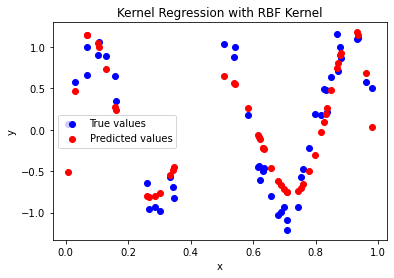

In [8]:
import matplotlib.pyplot as plt

# Plot the true values of y for test
x_test, y_test = zip(*test)
plt.scatter(x_test, y_test, color='blue', label='True values')

# Plot the predicted values of y for test
plt.scatter(x_test, y_pred, color='red', label='Predicted values')

plt.legend()
plt.title('Kernel Regression with RBF Kernel')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

a) Estimate the regularized Least Squares Regression using Kernel
Regression with Gradient Descent.

define kernel function

In [19]:
def rbf_kernel(x1, x2, gamma=1):
    return np.exp(-gamma*np.linalg.norm(x1-x2)**2)

define kernel matrix for training set T

In [20]:
K = np.zeros((500, 500))
for i in range(500):
    for j in range(500):
        K[i,j] = rbf_kernel(x[i], x[j], gamma=1)

In [21]:
lambd = 0.01
alpha = 0.01


In [22]:
w = np.zeros(500)


performing gradient descent

In [23]:
for i in range(1000):
    # Calculate the gradient of the loss function
    grad = 2*lambd*np.dot(K, w) - 2*np.dot(K, y)
    
    # Update the weight vector
    w -= alpha*grad

In [24]:
y_pred = np.zeros(50)
for i in range(50):
    k = np.zeros(500)
    for j in range(500):
        k[j] = rbf_kernel(x[j], x_test[i], gamma=1)
    y_pred[i] = np.dot(k, w)


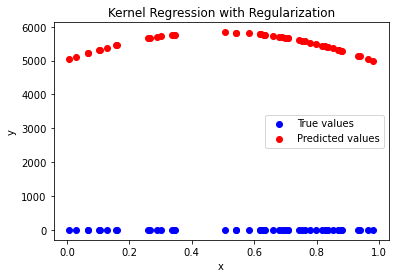

In [25]:
import matplotlib.pyplot as plt

# Plot the true values of y for test
x_test, y_test = zip(*test)
plt.scatter(x_test, y_test, color='blue', label='True values')

# Plot the predicted values of y for test
plt.scatter(x_test, y_pred, color='red', label='Predicted values')

plt.legend()
plt.title('Kernel Regression with Regularization')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

b

Iteration 0: Loss = 641.9832705780751
Iteration 100: Loss = inf
Iteration 200: Loss = nan
Iteration 300: Loss = nan
Iteration 400: Loss = nan
Iteration 500: Loss = nan
Iteration 600: Loss = nan
Iteration 700: Loss = nan
Iteration 800: Loss = nan
Iteration 900: Loss = nan


C:\Users\Harshit V. Shah\AppData\Local\Temp\ipykernel_17840\1741032720.py:15: RuntimeWarning: overflow encountered in square
  loss = np.sum((y_pred - y)**2) + lambd * np.sum(w**2)
C:\Users\Harshit V. Shah\AppData\Local\Temp\ipykernel_17840\1741032720.py:9: RuntimeWarning: invalid value encountered in subtract
  w = w - learning_rate * grad


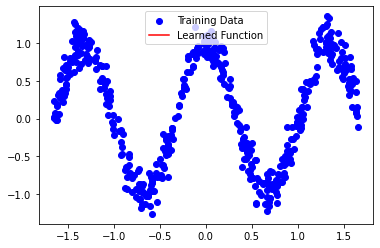

In [33]:
import numpy as np

def gradient_descent(X, y, w, lambd, learning_rate, max_iters):
    for i in range(max_iters):
        # calculate the gradient of the regularized loss function
        grad = 2*lambd*w + 2*np.dot(X.T, np.dot(X, w) - y)
        
        # update the weights using gradient descent
        w = w - learning_rate * grad
        
        # clip the predicted values to prevent overflow
        y_pred = np.clip(np.dot(X, w), 0, 1)
        
        # calculate the loss function
        loss = np.sum((y_pred - y)**2) + lambd * np.sum(w**2)
        
        if i % 100 == 0:
            print(f"Iteration {i}: Loss = {loss}")
        
    return w

# generate training data
np.random.seed(42)
X_train = np.random.rand(500, 1)
y_train = np.sin(5*np.pi*X_train) + np.random.normal(0, 0.15, (500, 1))

# normalize the input data
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean) / std

# add bias term to X_train
X_train = np.hstack((np.ones((500, 1)), X_train))

# set hyperparameters
lambd = 0.1
learning_rate = 0.1
max_iters = 1000

# initialize weights
w = np.zeros((2, 1))

# run gradient descent to find optimal weights
w_opt = gradient_descent(X_train, y_train, w, lambd, learning_rate, max_iters)

# plot the results
import matplotlib.pyplot as plt

# generate test data
X_test = np.linspace(0, 1, 50).reshape(-1, 1)
y_test = np.sin(5*np.pi*X_test) + np.random.normal(0, 0.15, (50, 1))

# normalize the test data using the same mean and std as the training data
X_test = (X_test - mean) / std

# add bias term to X_test
X_test = np.hstack((np.ones((50, 1)), X_test))

# predict using the learned weights
y_pred = np.dot(X_test, w_opt)

# plot the training data and the learned function
plt.scatter(X_train[:, 1], y_train, color='blue', label='Training Data')
plt.plot(X_test[:, 1], y_pred, color='red', label='Learned Function')
plt.legend()
plt.show()

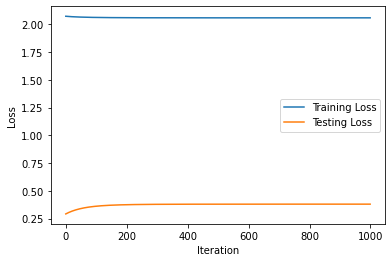

RMSE: 0.8720026685515215


In [34]:
import numpy as np
import matplotlib.pyplot as plt

# generate data
np.random.seed(42)
X = np.sort(np.random.rand(500, 1), axis=0)
y = np.sin(5 * np.pi * X).ravel() + np.random.normal(0, 0.15, 500)

# add noise to 5 random data points
np.random.seed(42)
idx = np.random.choice(500, 5, replace=False)
y[idx] = y[idx] * 20

# split data into training and testing sets
X_train, y_train = X[:400], y[:400]
X_test, y_test = X[400:], y[400:]

# add bias term to X
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# initialize weights
w = np.zeros(X_train.shape[1])

# set hyperparameters
alpha = 0.01
lambd = 1

# gradient descent loop
num_iterations = 1000
train_loss_history = []
test_loss_history = []
for i in range(num_iterations):
    # compute training loss
    train_loss = np.mean((X_train.dot(w) - y_train)**2) / 2
    train_loss_history.append(train_loss)
    
    # compute testing loss
    test_loss = np.mean((X_test.dot(w) - y_test)**2) / 2
    test_loss_history.append(test_loss)
    
    # compute gradient of objective function
    grad = (X_train.T.dot(X_train.dot(w) - y_train)) / X_train.shape[0] + lambd * w
    
    # update weights
    w -= alpha * grad

# plot training and testing loss
plt.plot(range(num_iterations), train_loss_history, label='Training Loss')
plt.plot(range(num_iterations), test_loss_history, label='Testing Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

# predict on test data
y_pred = X_test.dot(w)

# calculate RMSE
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print("RMSE:", rmse)


# Q2

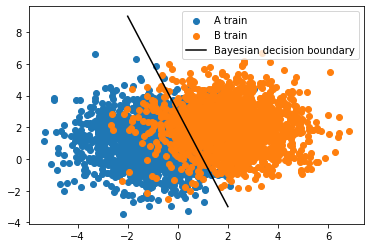

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Set the mean and covariance matrices for the two datasets
mu1 = np.array([-1, 1])
mu2 = np.array([2, 2])
sigma1 = np.array([[2, 0], [0, 2]])
sigma2 = np.array([[2, 0], [0, 2]])

# Generate dataset A and B
np.random.seed(1)  # set random seed for reproducibility
A = np.random.multivariate_normal(mu1, sigma1, 2000)
B = np.random.multivariate_normal(mu2, sigma2, 2000)

# Split datasets A and B into training and testing sets
A_train, A_test = A[:1750], A[1750:]
B_train, B_test = B[:1750], B[1750:]
if len(A) == len(B):
    P_w1 = 0.5
    P_w2 = 0.5
    
# Compute the optimal Bayesian decision boundary
w = mu1 - mu2
w0 = (0.5 *(mu1 + mu2)) - ((sigma1[0][0]/ np.linalg.norm(mu1 - mu2)) * (np.log(P_w1/P_w2)) *(mu1 - mu2))
x1 = np.linspace(-2, 2, 100)
x2 = (w.T@w0 - w[0]*x1) / w[1]

# Plot the datasets and decision boundary
plt.scatter(A_train[:, 0], A_train[:, 1], label='A train')
plt.scatter(B_train[:, 0], B_train[:, 1], label='B train')
plt.plot(x1, x2, color='k', label='Bayesian decision boundary')
plt.legend()
plt.show()

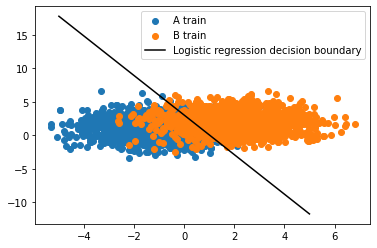

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set the mean and covariance matrices for the two datasets
mu1 = np.array([-1, 1])
mu2 = np.array([2, 2])
sigma1 = np.array([[2, 0], [0, 2]])
sigma2 = np.array([[2, 0], [0, 2]])

# Generate dataset A and B
np.random.seed(1)  # set random seed for reproducibility
A = np.random.multivariate_normal(mu1, sigma1, 2000)
B = np.random.multivariate_normal(mu2, sigma2, 2000)

# Split datasets A and B into training and testing sets
A_train, A_test = A[:1750], A[1750:]
B_train, B_test = B[:1750], B[1750:]

# Combine the training sets into a single dataset
X_train = np.vstack((A_train, B_train))
y_train = np.hstack((np.zeros(1750), np.ones(1750)))

# Initialize the parameters
theta = np.zeros(3)  # coefficients of the decision boundary (including the intercept term)
alpha = 0.01  # learning rate
num_iterations = 10000

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cost function
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    J = -1/m * (y.dot(np.log(h)) + (1-y).dot(np.log(1-h)))
    return J

# Define the gradient function
def gradient(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    grad = 1/m * X.T.dot(h - y)
    return grad

# Train the logistic regression model using gradient descent
for i in range(num_iterations):
    theta -= alpha * gradient(np.hstack((np.ones((len(X_train), 1)), X_train)), y_train, theta)

# Plot the datasets and decision boundary
x1 = np.linspace(-5, 5, 100)
x2 = -(theta[0] + theta[1]*x1) / theta[2]
plt.scatter(A_train[:, 0], A_train[:, 1], label='A train')
plt.scatter(B_train[:, 0], B_train[:, 1], label='B train')
plt.plot(x1, x2, color='k', label='Logistic regression decision boundary')
plt.legend()
plt.show()

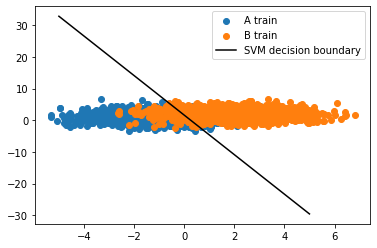

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set the mean and covariance matrices for the two datasets
mu1 = np.array([-1, 1])
mu2 = np.array([2, 2])
sigma1 = np.array([[2, 0], [0, 2]])
sigma2 = np.array([[2, 0], [0, 2]])

# Generate dataset A and B
np.random.seed(1)  # set random seed for reproducibility
A = np.random.multivariate_normal(mu1, sigma1, 2000)
B = np.random.multivariate_normal(mu2, sigma2, 2000)

# Split datasets A and B into training and testing sets
A_train, A_test = A[:1750], A[1750:]
B_train, B_test = B[:1750], B[1750:]

# Combine the training sets into a single dataset
X_train = np.vstack((A_train, B_train))
y_train = np.hstack((np.ones(1750), -np.ones(1750)))

# Initialize the parameters
theta = np.zeros(3)  # coefficients of the decision boundary (including the intercept term)
alpha = 0.001  # learning rate
C = 1  # regularization parameter
num_iterations = 10000

# Define the hinge loss function
def hinge_loss(y_true, y_pred):
    return np.maximum(0, 1 - y_true*y_pred)

# Define the SVM objective function
def svm_objective(X, y, theta, C):
    m = len(y)
    y_pred = X.dot(theta)
    obj = 1/2 * theta.T.dot(theta) + C/m * np.sum(hinge_loss(y, y_pred))
    return obj

# Define the gradient of the SVM objective function
def svm_gradient(X, y, theta, C):
    m = len(y)
    y_pred = X.dot(theta)
    grad = theta + C/m * np.sum((-y*X.T).T[hinge_loss(y, y_pred) > 0], axis=0)
    return grad

# Train the SVM model using gradient descent
for i in range(num_iterations):
    theta -= alpha * svm_gradient(np.hstack((np.ones((len(X_train), 1)), X_train)), y_train, theta, C)

# Plot the datasets and decision boundary
x1 = np.linspace(-5, 5, 100)
x2 = -(theta[0] + theta[1]*x1) / theta[2]
plt.scatter(A_train[:, 0], A_train[:, 1], label='A train')
plt.scatter(B_train[:, 0], B_train[:, 1], label='B train')
plt.plot(x1, x2, color='k', label='SVM decision boundary')
plt.legend()
plt.show()


In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Generate datasets A and B
np.random.seed(42)
mu1 = [-1, 1]
mu2 = [2, 2]
cov = [[2, 0], [0, 2]]
A = np.random.multivariate_normal(mu1, cov, 2000)
B = np.random.multivariate_normal(mu2, cov, 2000)

# Separate 250 data points from each class as a testing set
A_train, A_test = A[:1750], A[1750:]
B_train, B_test = B[:1750], B[1750:]

# Train logistic regression model using gradient descent
X_train = np.vstack((A_train, B_train))
y_train = np.hstack((np.ones(1750), -np.ones(1750)))
X_train = np.hstack((np.ones((len(X_train), 1)), X_train))  # add intercept term
theta_logreg = np.zeros(X_train.shape[1])  # initialize parameters
alpha = 0.01  # learning rate
num_iters = 1000  # number of iterations
for i in range(num_iters):
    theta_logreg -= alpha * (1 / len(X_train)) * X_train.T.dot(sigmoid(X_train.dot(theta_logreg)) - y_train)

# Train SVM model using gradient descent
theta_svm = np.zeros(X_train.shape[1])  # initialize parameters
C = 1  # regularization parameter
num_iters = 1000  # number of iterations
for i in range(num_iters):
    grad = hinge_loss_gradient(X_train, y_train, theta_svm, C)
    theta_svm -= alpha * grad

# Define decision boundary function
def decision_boundary(x):
    logreg_prob = sigmoid(np.dot(x, theta_logreg))
    svm_prob = np.dot(x, theta_svm)
    if logreg_prob >= 0.5 and svm_prob >= 0:
        return 1
    elif logreg_prob < 0.5 and svm_prob < 0:
        return -1
    else:
        return 0

# Generate grid points for plotting decision boundary
xx, yy = np.meshgrid(np.linspace(-6, 6, 100), np.linspace(-6, 6, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Plot decision boundary
zz = np.array([decision_boundary(x) for x in grid_points]).reshape(xx.shape)
plt.contour(xx, yy, zz, levels=[0], colors='k')

# Plot datasets A and B
plt.scatter(A_train[:, 0], A_train[:, 1], marker='o', c='r', label='A')
plt.scatter(B_train[:, 0], B_train[:, 1], marker='x', c='b', label='B')
plt.legend()
plt.title('Bayesian Decision Boundary')
plt.show()

# Evaluate performance of models using testing sets
X_test = np.vstack((A_test, B_test))
y_test = np.hstack((np.ones(250), -np.ones(250)))
X_test = np.hstack((np.ones((len(X_test), 1)), X_test))  # add intercept term

# Logistic Regression accuracy
y_pred = sigmoid(X_test.dot(theta_logreg)) > 0.5
logreg_accuracy = np.mean(y

SyntaxError: unexpected EOF while parsing (1257997911.py, line 67)